# 使用了一个概念：confidence
https://blog.csdn.net/abcdefg90876/article/details/112598060?utm_medium=distribute.pc_relevant.none-task-blog-2~default~baidujs_title~default-0.control&spm=1001.2101.3001.4242

In [1]:
import json
import numpy as np
# import torch as th

In [2]:
with open(r'E:\DATABASE\FirstGNN\patient\wfz\GNN_7\flowrecorder.json', 'r', encoding='utf-8') as f:
    recorder = json.load(f)

In [4]:
record = []  # element = [avg_conf, avg_acc, bc]
# 取出记录，多取几个
# 300-325

for i in range(300, 325):
    t1 = recorder['{0}-th'.format(i)]
    logits = np.array(t1['logits'])
    labels = np.array(t1['labels'])
    avg_conf, avg_acc, _ = ECE(logits, labels)
    record.append([avg_conf, avg_acc])

In [11]:
record = np.array(record)
avg_conf_batch = np.mean(record[:,0],axis=0)
avg_acc_batch = np.mean(record[:,1],axis=0)
avg_conf_batch, avg_acc_batch

(array([0.        , 0.        , 0.08916881, 0.36549279, 0.45724597,
        0.5519007 , 0.65278123, 0.7538228 , 0.85449779, 0.9657954 ]),
 array([0.        , 0.        , 0.06      , 0.38974603, 0.50954361,
        0.66173416, 0.79677119, 0.86271259, 0.90961336, 0.93068018]))

In [4]:
t1.keys()

dict_keys(['ave_tr_loss', 'tr_loss', 'ave_tr_acc', 'tr_acc', 'ave_ts_loss', 'ave_ts_acc', 'ts_acc', 'logits', 'labels'])

In [3]:
def ECE(logits: np.ndarray, labels: np.ndarray):
    def softmax(x, dim=1):
        if type(x) != 'numpy.ndarray':
            x = np.array(x)
        x = np.exp(x)
        x1 = np.transpose(x)
        x = x1/np.sum(x, dim)
        return np.transpose(x)

    sf_log = softmax(logits[1:])
    id_m = np.argmax(sf_log, axis=1)
    # 样本属性申明,四元向量
    sample = {'n': 0, 'res': 0, 'conf': 0, 'bin': 0}
    # bsum = {acc, conf}, bc = count
    bsum, bc = [[0, 0] for _ in range(10)], []
    # sample list
    slist = []
    for i in range(len(id_m)):
        sample = [0, 0, 0, 0]
        # 准确与否
        if id_m[i] == labels[i+1]:
            sample[1] = 1
        else:
            sample[1] = 0
        # p
        sample[2] = sf_log[i][id_m[i]]
        # 分桶
        for p in range(10):
            if sample[2] > p*0.1 and sample[2] <= (p+1)*0.1:
                sample[3] = p
        sample[0] = i
        slist.append(sample)

    for bn in range(10):
        bcc = 0
        for i in range(len(id_m)):
            if slist[i][3] == bn:
                bsum[bn][0] += slist[i][1]  # acc
                bsum[bn][1] += slist[i][2]  # conf
                bcc += 1
        bc.append(bcc)

    avg_conf = list()
    avg_acc = list()
    for i in range(10):
        if bc[i] != 0:
            avg_acc.append(bsum[i][0]/bc[i])
            avg_conf.append(bsum[i][1]/bc[i])
        else:
            avg_acc.append(0)
            avg_conf.append(0)
    return avg_conf, avg_acc, bc

## yiqi

In [96]:
# 分桶
# biuld bin
bin = []
for i in np.arange(0,10):
    bin.append([])

# 放置元素
for i in range(len(id_m)):
    sample = total_bin[i]
    for j in range(0,10):
        if sample[1] < 0.1*(j+1) and sample[1] > 0.1*j:
            bin[j].append(i)

In [115]:
bsum, bc = [], []
bsum, bc

([], [])

In [62]:
# 计算桶属性
avg_conf = list()
avg_acc = list()
for j in range(0,10):
    b_acc = 0
    b_conf = 0
    for id in bin[j]:
        b_acc += total_bin[]

NameError: name 'size' is not defined

In [42]:
v_log = []
for i in range(len(id_m)):
    v_log.append(sf_log[i,id_m[i]])

In [43]:
# tof = []
# for i in range(len(id_m)):
#     if id_m[i] == labels[i+1]:
#         tof.append(id_m[i]*0.1)
#     else:
#         tof.append(0)

In [44]:
# bin
bin = {}
for i in np.arange(0,10):
    bin['{}'.format(i)] = dict()
    bin[f'{i}']['v'] = list()
    bin[f'{i}']['tof'] = list()

for i2 in range(len(id_m)):
    id = 0
    v = sf_log[i2, id_m[i2]]
    for i in np.arange(0,1,0.1):
        if i < v and v < (i+0.1):
            bin[f'{id}']['v'].append(v)
            bin[f'{id}']['tof'].append(tof[i2]*i)
        id +=1


In [87]:
i=1
# bin[f'{4}']['v']
afc = np.array(bin[f'{4}']['v'])
# afc
np.mean(afc, axis=0)

0.4684227456723457

In [45]:
avg_conf = list()
avg_acc = list()
num = list()
for i in range(10):
    if bin[f'{i}']['v'] == []:
        avg_conf.append(0)
        avg_acc.append(0)
        num.append(0)
    else:
        num.append(len(bin[f'{i}']['v'])) 
        avg_conf.append(np.mean(bin[f'{i}']['v'], axis=0))
        avg_acc.append(np.mean(bin[f'{i}']['tof'], axis=0))

In [46]:
avg_conf, avg_acc

([0,
  0,
  0,
  0.3487195393712365,
  0.4684227456723457,
  0.550247284642358,
  0.6564190149543077,
  0.756842370274204,
  0.8617083231846192,
  0.9675013252656],
 [0,
  0,
  0,
  0.0,
  0.05666666666666667,
  0.06315789473684212,
  0.08769230769230772,
  0.14,
  0.16640000000000005,
  0.1822167487684729])

# matplot

In [89]:
import matplotlib.pyplot as plt

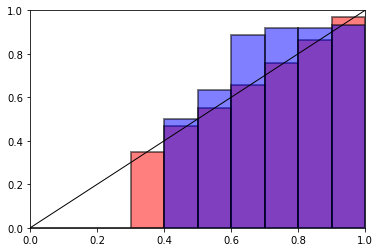

In [143]:
figure, ax = plt.subplots()
ax.bar(np.arange(0.05,1.05,0.1), avg_conf, color='r', alpha=0.5, width=0.1, 
edgecolor='black', linewidth=2)
ax.bar(np.arange(0.05,1.05,0.1), avg_acc, color='b', alpha=0.5, width=0.1, 
edgecolor='black', linewidth=2)
# ax.bar(range(1,11,1), avg_conf, color='r', alpha=0.5)
# ax.bar(range(1,11,1), avg_acc, color='b', alpha=0.5)
ax.set_ylim(0,1)
ax.set_xlim(0,1)
line1 = [[0,0],[1,1]]
(line1_xs, line1_ys) = zip(*line1)
ax.add_line(plt.Line2D(line1_xs, line1_ys, linewidth=1, color='black'))
# ax.plot(avg_conf,avg_acc)
# plt.show()

In [150]:
avg_acc = np.array(avg_acc)
avg_conf = np.array(avg_conf)
num = np.array(num)
ece_list = (avg_conf-avg_acc) * num
ece = np.sum(ece_list)/np.sum(num)

In [151]:
ece

0.13923936666721182